In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pickle
import seaborn as sns
import sys

from collections import defaultdict
from os.path import join

DATA = defaultdict(list)
SERIALIZE = lambda x: x # pickle.dumps(x)

# Policy Network Parameter Byte Size
Here, we get the `bytesize` of each of the trained policy network parameters and plot the distribution via an ECDF plot. We then conclude that the number of bytes for the policy network parameters in a serialized format (via `pickle`) is `640`.

Average byte size of the policy networks parameters: 640.0


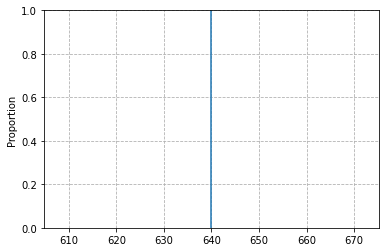

In [9]:
policy_network_bytes = []
policy_network_params = []
for trainer_dir in ["FedRL", "MARL", "SARL"]:
    for netfile_dir in ["double", "grid-3x3", "grid-5x5"]:
        pattern = join("..", "example_weights", "Final", trainer_dir, netfile_dir, "*.pkl")
        for path in glob.glob(pattern):
            with open(path, "rb") as f:
                obj = pickle.load(f)
                policy_network_bytes.append(sys.getsizeof(obj))
                policy_network_params.append(obj)

print(f"Average byte size of the policy networks parameters: "
      f"{np.mean(policy_network_bytes)}")
sns.ecdfplot(policy_network_bytes)
plt.grid(linestyle="--")
plt.show()

# Rank Byte Sizes
Since the ranks are essentially a $1\times4$ vector (i.e., a vector with `4` different ranks), then the byte size should just be roughly the number of bytes used to represent the float $\times4$. For assuredness, we will perform the analysis here to confirm.

In [3]:
rank_example = np.zeros(4, dtype=np.float32)
print(f"Number of bytes for ranks is {sys.getsizeof(SERIALIZE(rank_example))} bytes.")

Number of bytes for ranks is 112 bytes.


# Action Size
This is also straightforward. Since it's just a single integer, should be 8 bytes.

In [4]:
sys.getsizeof(SERIALIZE(0))

24

# Observation Sizes
Since the observations from the traffic light to the edge-RSU is always a $1\times10$ vector, we just have to `pickle` (or serialize) a $1\times10$ vector and get its size.

In [5]:
obs_vector = np.zeros(10, dtype=np.float32)
print(f"Size of observations from traffic lights: "
      f"{sys.getsizeof(SERIALIZE(obs_vector))} bytes.")

Size of observations from traffic lights: 136 bytes.


# Vehicle Information to Traffic Light Sizes
This is the most subjective of the data transmitted through the simulated network. For the purposes of this work, we will consider that each vehicle will submit `3` values (thus communicates a $1\times3$ vector). These three values are:
* longitude
* latitude
* current speed

The (longitutde, latitude) pair can provide the traffic light with enough information to discern which lane the vehicle is on. The current speed can then be used for identifying halted vehicles, average speed, etc.

In [13]:
tls_info_vector = np.zeros(3, dtype=np.int8)
print(f"Size of vehicle information to traffic lights: "
      f"{sys.getsizeof(SERIALIZE(tls_info_vector))} bytes.")

Size of vehicle information to traffic lights: 99 bytes.
